<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predcting Card Usage." </div>

### Data Description

Using the customer demographics, such as gender, marital status, education level and income category to determine which customer demographic is more likely to churn.
Analyzing the customer’s spending behavior leading up to churning and using this data to better predict the likelihood of a customer of churning in the future.
Creating a classifier that can predict potential customers who are more susceptible to attrition based on their credit score, credit limit, utilization ratio and other spending behavior metrics over time; this could be used as an early warning system for predicting potential attrition before it happens


- CLIENTNUM	Unique identifier for each customer. (Integer)
- Attrition_Flag	Flag indicating whether or not the customer has churned out. (Boolean)
- Customer_Age	Age of customer. (Integer)
- Gender	Gender of customer. (String)
- Dependent_count	Number of dependents that customer has. (Integer)
- Education_Level	Education level of customer. (String)
- Marital_Status	Marital status of customer. (String)
- Income_Category	Income category of customer. (String)
- Card_Category	Type of card held by customer. (String)
- Months_on_book	How long customer has been on the books. (Integer)
- Total_Relationship_Count	Total number of relationships customer has with the credit card provider. (Integer)
- Months_Inactive_12_mon	Number of months customer has been inactive in the last twelve months. (Integer)
- Contacts_Count_12_mon	Number of contacts customer has had in the last twelve months. (Integer)
- Credit_Limit	Credit limit of customer. (Integer)
- Total_Revolving_Bal	Total revolving balance of customer. (Integer)
- Avg_Open_To_Buy	Average open to buy ratio of customer. (Integer)
- Total_Amt_Chng_Q4_Q1	Total amount changed from quarter 4 to quarter 1. (Integer)
- Total_Trans_Amt	Total transaction amount. (Integer)
- Total_Trans_Ct	Total transaction count. (Integer)
- Total_Ct_Chng_Q4_Q1	Total count changed from quarter 4 to quarter 1. (Integer)
- Avg_Utilization_Ratio	Average utilization ratio of customer. (Integer)

- [1. Exploring The Dataset](#1)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Cleaning](#1.3)
        - [1..1 Missing Value](#1.3.1)
        - [1.3.2 Duplicated](#1.3.2)
        - [1.3.3 Outliter](#1.3.3)
- [2.Exploratory Data Anlysis(EDA)](#2)
   
- [3. Data preprocessing and feature engineering](#4)
    - [3.1 Min-Max Scaling or Standardization?](#4.1)
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [2]:
df = pd.read_csv('BankChurners.csv')
df.shape

(10127, 22)

In [3]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 21'], inplace=True)

In [6]:
df.shape

(10127, 21)

In [7]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<a id="1.3"></a>
## <b>1.3 <span style='color:#00008B'>Data Cleaning</span></b>


<a id="1.3.1"></a>
### <b>1.3.1 <span style='color:#00008B'>Missing Value</span></b>


In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<a id="1.3.2"></a>
### <b>1.3.2 <span style='color:#00008B'>Duplicated</span></b>


In [9]:
df.duplicated().sum()

0

In [10]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

<a id="1.3.3"></a>
### <b>1.3.3 <span style='color:#00008B'>Outlier</span></b>

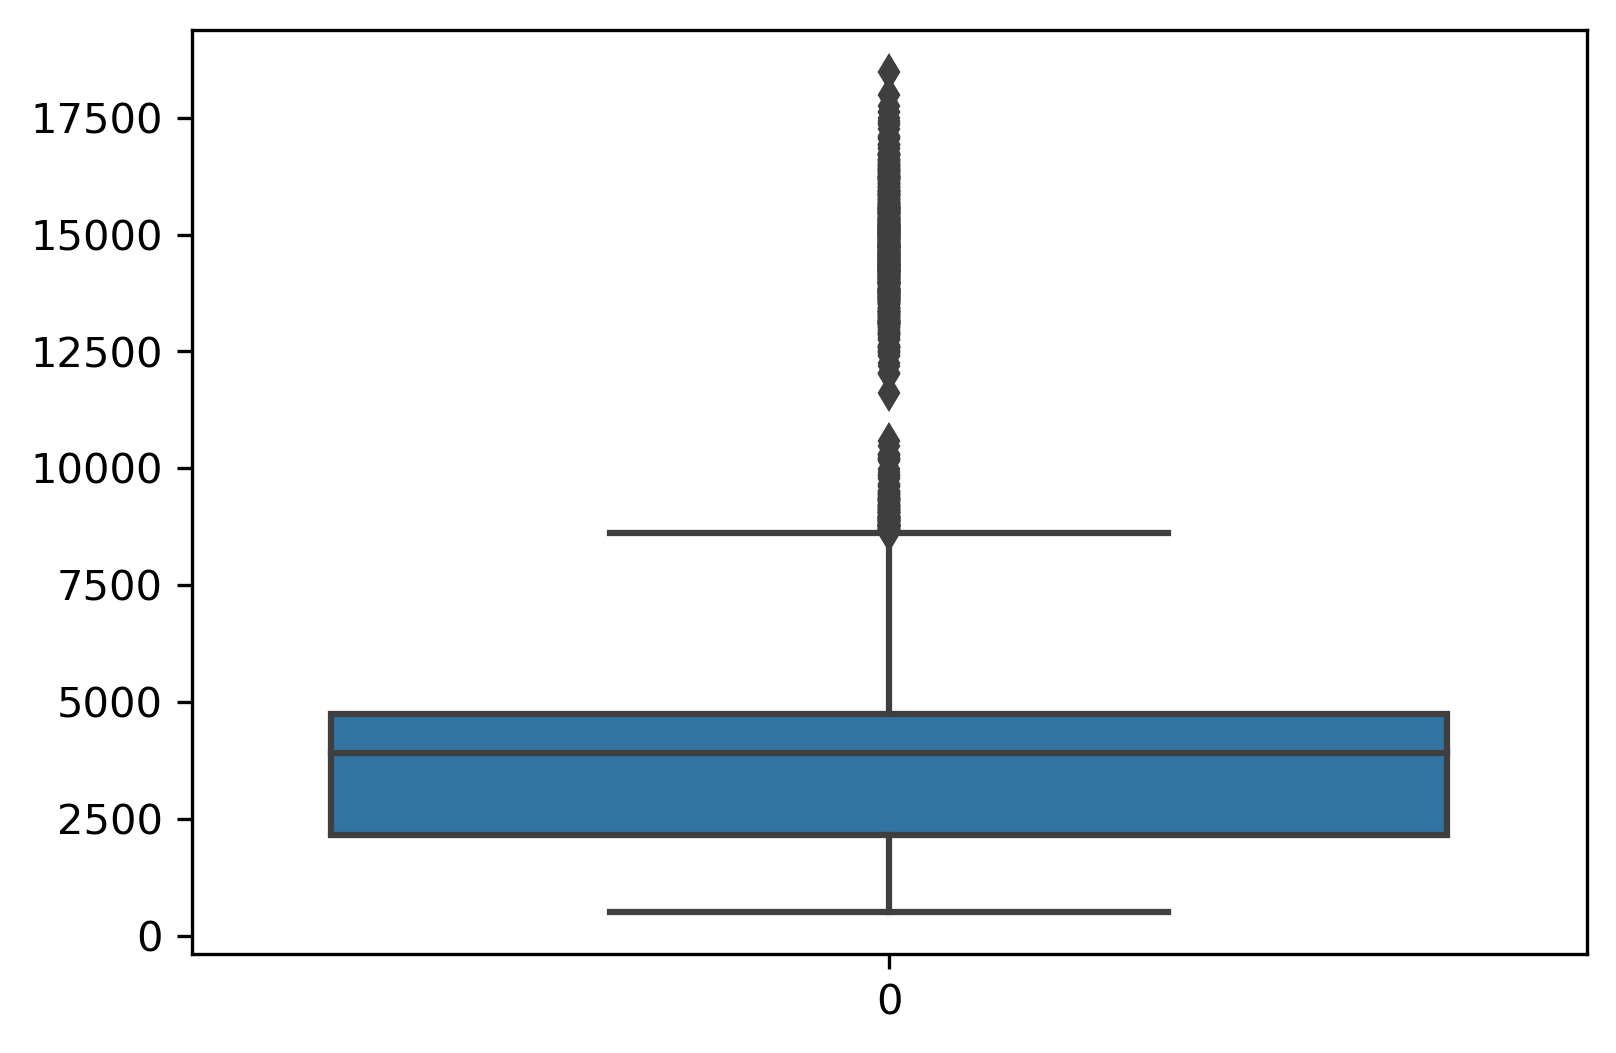

In [11]:
plt.rcParams['figure.dpi']=300
plt.figure(figsize=(6, 4))
sns.boxplot(data =df['Total_Trans_Amt'])
plt.show()

In [12]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers

In [13]:
index_outlier = outlier_detection(df['Total_Trans_Amt']).index

In [14]:
df.iloc[index_outlier]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8591,772313358,Existing Customer,50,M,3,High School,Single,$80K - $120K,Blue,39,3,3,2,21322.0,2216,19106.0,0.921,8693,91,0.569,0.104
8650,785515533,Existing Customer,43,F,2,College,Married,Less than $40K,Blue,37,3,3,1,5380.0,1337,4043.0,0.845,8947,93,0.576,0.249
8670,771719283,Existing Customer,39,F,4,Doctorate,Married,Less than $40K,Blue,27,2,1,1,8587.0,1324,7263.0,0.897,8854,92,0.643,0.154
8708,712266633,Existing Customer,51,F,2,Unknown,Married,$40K - $60K,Blue,36,2,2,1,14800.0,1020,13780.0,0.896,8796,94,0.593,0.069
8734,758211483,Existing Customer,45,M,5,Unknown,Married,$60K - $80K,Blue,38,1,2,3,6895.0,2314,4581.0,0.840,8778,85,0.604,0.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [15]:
df.drop(index=index_outlier, inplace=True)

In [16]:
len(outlier_detection(df['Total_Trans_Amt']))

110

In [17]:
len(outlier_detection(df['Total_Trans_Amt']))/len(df)

0.01191636875744773

In [18]:
len(df)

9231


<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span>Exploratory Data Anlysis(EDA) with Data Visualization</div>

In [19]:
categoric_columns = []
numeric_columns = []
dataset = df.copy()
columns = list(dataset.columns)
for i in columns:
    if len(dataset[i].unique()) > 100:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)


In [20]:
df[numeric_columns]

,CLIENTNUM,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...
10067,717390408,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,720328983,9611.0,0,9611.0,0.840,7636,64,0.829,0.000
10103,717185658,22754.0,0,22754.0,0.799,8531,77,0.791,0.000
10119,716893683,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172


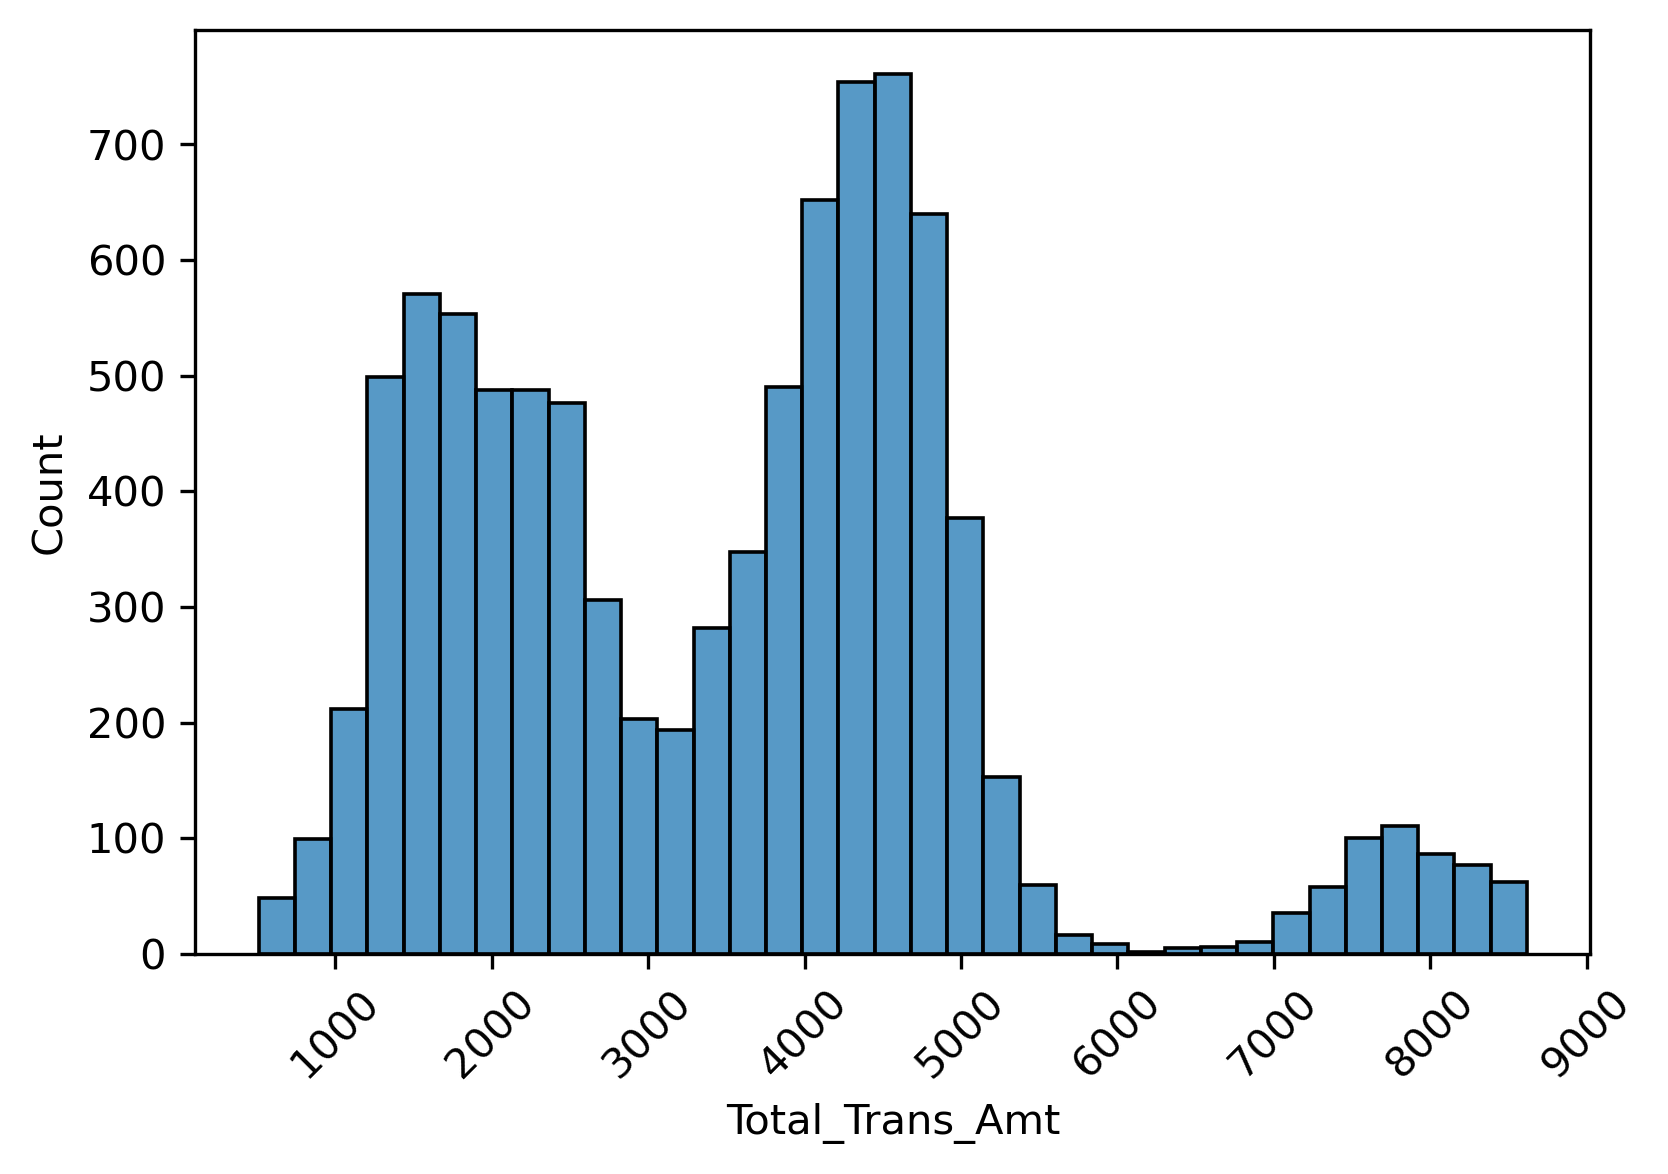

In [21]:
plt.figure(figsize= (6, 4))
sns.histplot(df['Total_Trans_Amt'])
plt.xticks(rotation = 45)
plt.show()

In [22]:
df['Total_Trans_Amt'].describe()

count    9231.000000
mean     3494.972159
std      1674.625770
min       510.000000
25%      2050.000000
50%      3654.000000
75%      4520.000000
max      8618.000000
Name: Total_Trans_Amt, dtype: float64

In [23]:
df1=df.loc[outlier_detection(df['Total_Trans_Amt']).index]

In [24]:
df1['Total_Trans_Amt'].describe()

count     110.000000
mean     8413.663636
std       116.354353
min      8226.000000
25%      8307.000000
50%      8418.500000
75%      8516.250000
max      8618.000000
Name: Total_Trans_Amt, dtype: float64

In [25]:
df[categoric_columns].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
count,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000
mean,46.452822,2.351316,36.019391,3.950493,2.350666,2.471130
std,7.999317,1.296620,7.966775,1.503494,1.012805,1.114956
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000


In [26]:
df[numeric_columns].describe()

,CLIENTNUM,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9.231000e+03,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000
mean,7.394771e+08,8092.574271,1147.134222,6945.440050,0.756653,3494.972159,60.902719,0.707998,0.284691
std,3.702344e+07,8710.476866,817.520661,8721.527385,0.226352,1674.625770,20.086052,0.246620,0.281152
min,7.080833e+08,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130865e+08,2454.000000,0.000000,1181.000000,0.622000,2050.000000,43.000000,0.568000,0.000000
50%,7.179712e+08,4188.000000,1257.000000,3124.000000,0.730000,3654.000000,65.000000,0.692000,0.188000
75%,7.751757e+08,9975.500000,1772.000000,8891.500000,0.858000,4520.000000,77.000000,0.820000,0.525000
max,8.283431e+08,34516.000000,2517.000000,34516.000000,3.397000,8618.000000,113.000000,3.714000,0.999000


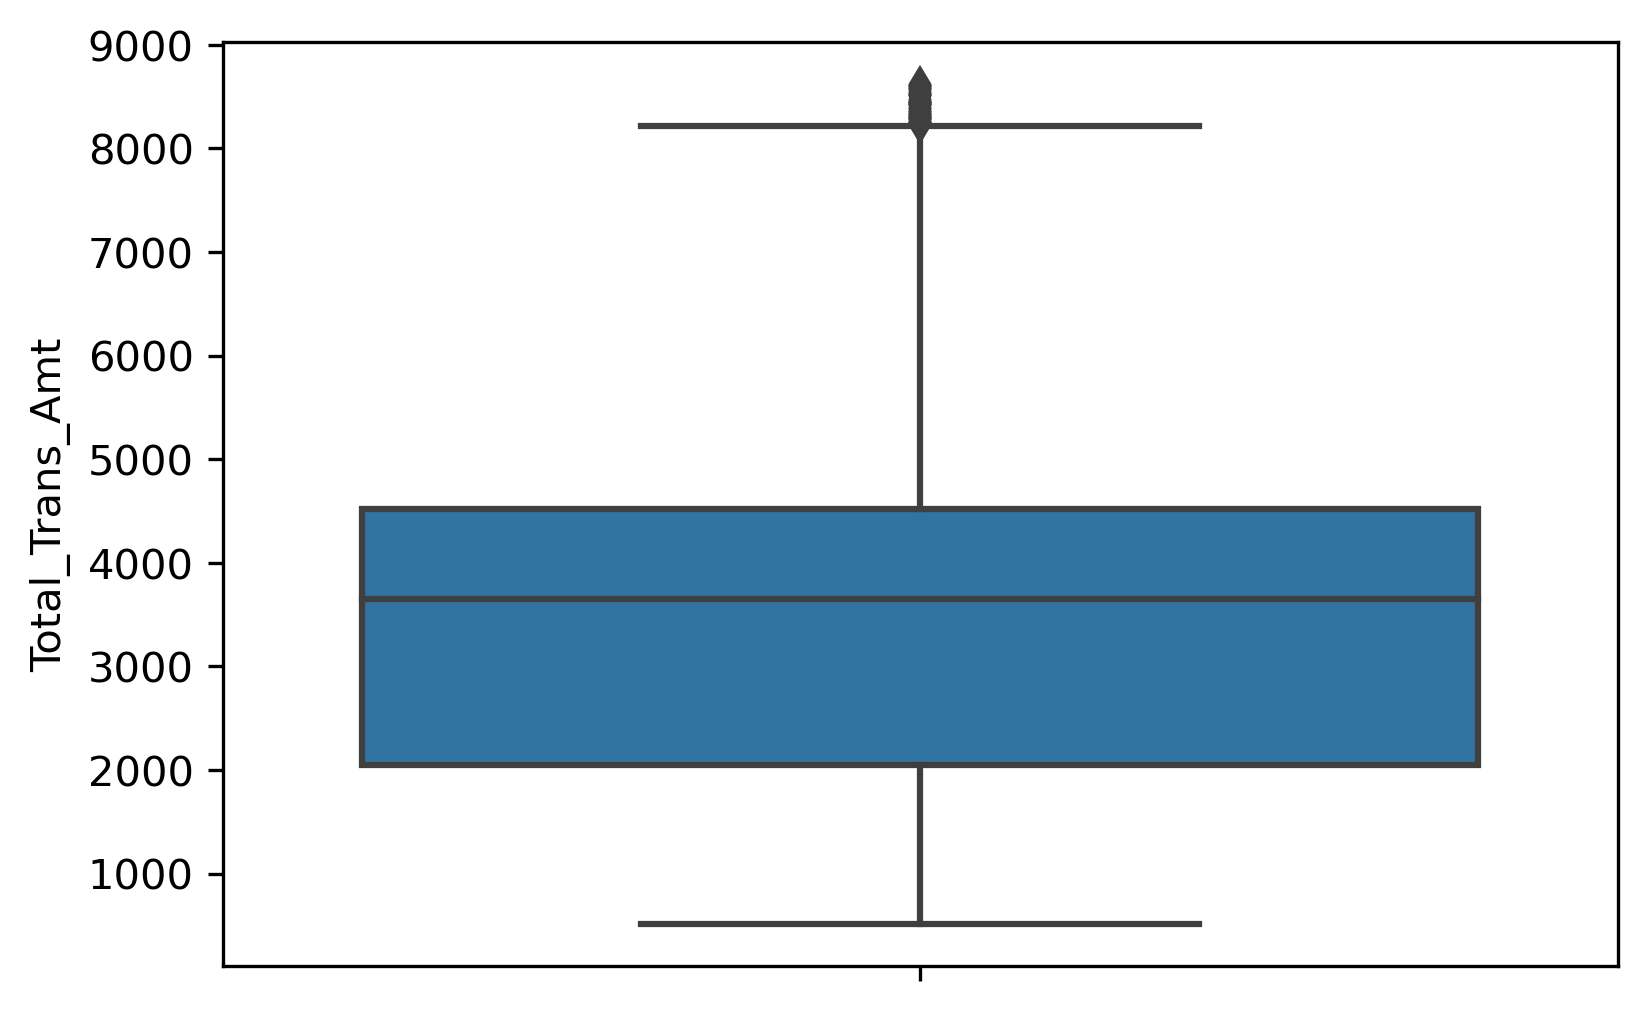

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(y = df['Total_Trans_Amt'])
plt.show()

In [28]:
df[categoric_columns]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10067,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3
10089,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3
10103,Attrited Customer,51,M,1,High School,Married,$80K - $120K,Blue,36,4,3,4
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3


In [56]:
df['Attrition_Flag'].replace({'Existing Customer':1, 
                    'Attrited Customer':0}, inplace=True)

In [58]:
df['Gender'].replace({'M':1, 
                    'F':0}, inplace=True)

In [61]:
df['Education_Level'].value_counts()

Education_Level
Graduate         2845
High School      1831
Unknown          1376
Uneducated       1349
College           944
Post-Graduate     469
Doctorate         417
Name: count, dtype: int64

In [62]:
df['Education_Level'].replace({                          
                               'Unknown':0,
                               'Uneducated':0,
                               'College':1,
                               'High School':2,
                                'Graduate':3,
                               'Post-Graduate':4,
                               'Doctorate':5}, inplace=True)

In [64]:
df['Marital_Status'].value_counts()

Marital_Status
Married     4288
Single      3584
Divorced     680
Unknown      679
Name: count, dtype: int64

In [65]:
df['Marital_Status'].replace({                          
                               'Unknown':0,
                               'Single':1,
                               'Married':2,
                               'Divorced':3}, inplace=True)

In [67]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3308
$40K - $60K       1629
$80K - $120K      1362
$60K - $80K       1243
Unknown           1041
$120K +            648
Name: count, dtype: int64

In [68]:
df['Income_Category'].replace({                          
                               'Unknown':0,
                               'Less than $40K':1,
                               '$40K - $60K':2,
                                '$60K - $80K':3,
                                '$80K - $120K':4,
                               '$120K +':5}, inplace=True)

In [70]:
df['Card_Category'].value_counts()

Card_Category
Blue        8733
Silver       405
Gold          82
Platinum      11
Name: count, dtype: int64

In [71]:
df['Card_Category'].replace({                          
                               'Blue':0,
                               'Silver':1,
                               'Gold':2,
                               'Platinum':3}, inplace=True)

In [72]:
df[categoric_columns]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,1,45,1,3,2,2,3,0,39,5,1,3
1,1,49,0,5,3,1,1,0,44,6,1,2
2,1,51,1,3,3,2,4,0,36,4,1,0
3,1,40,0,4,2,0,1,0,34,3,4,1
4,1,40,1,3,0,2,3,0,21,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10067,0,49,0,4,0,2,2,0,36,5,2,3
10089,0,52,0,5,0,2,1,0,36,4,3,3
10103,0,51,1,1,2,2,4,0,36,4,3,4
10119,0,55,0,3,0,1,0,0,47,4,3,3


A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [75]:
x_number = df[numeric_columns].drop('Total_Trans_Amt', axis= 1)

In [76]:
df[numeric_columns].corr()

,CLIENTNUM,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.015256,-0.000475,0.015281,0.020373,-0.006193,0.004171,0.012827,-0.003742
Credit_Limit,0.015256,1.000000,0.033402,0.995602,0.003632,0.027417,-0.038090,-0.014001,-0.472393
Total_Revolving_Bal,-0.000475,0.033402,1.000000,-0.060377,0.060070,0.009345,0.018990,0.091895,0.642564
Avg_Open_To_Buy,0.015281,0.995602,-0.060377,1.000000,-0.002004,0.026506,-0.039822,-0.022597,-0.532025
Total_Amt_Chng_Q4_Q1,0.020373,0.003632,0.060070,-0.002004,1.000000,0.017147,-0.013527,0.389564,0.042938
Total_Trans_Amt,-0.006193,0.027417,0.009345,0.026506,0.017147,1.000000,0.822042,0.084874,0.026531
Total_Trans_Ct,0.004171,-0.038090,0.018990,-0.039822,-0.013527,0.822042,1.000000,0.106378,0.076963
Total_Ct_Chng_Q4_Q1,0.012827,-0.014001,0.091895,-0.022597,0.389564,0.084874,0.106378,1.000000,0.084513
Avg_Utilization_Ratio,-0.003742,-0.472393,0.642564,-0.532025,0.042938,0.026531,0.076963,0.084513,1.000000


In [77]:
VIF(x_number)

,Features,VIF
0,Credit_Limit,inf
1,Total_Revolving_Bal,inf
2,Avg_Open_To_Buy,inf
3,CLIENTNUM,24.71
4,Total_Amt_Chng_Q4_Q1,14.25
5,Total_Ct_Chng_Q4_Q1,11.09
6,Total_Trans_Ct,10.23
7,Avg_Utilization_Ratio,5.94


In [78]:
x_number = x_number.drop('Credit_Limit', axis = 1)

In [79]:
VIF(x_number)

,Features,VIF
0,CLIENTNUM,24.71
1,Total_Amt_Chng_Q4_Q1,14.25
2,Total_Ct_Chng_Q4_Q1,11.09
3,Total_Trans_Ct,10.23
4,Total_Revolving_Bal,6.26
5,Avg_Utilization_Ratio,5.94
6,Avg_Open_To_Buy,2.81


In [80]:
x_number.drop(columns = [])

,CLIENTNUM,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,777,11914.0,1.335,42,1.625,0.061
1,818770008,864,7392.0,1.541,33,3.714,0.105
2,713982108,0,3418.0,2.594,20,2.333,0.000
3,769911858,2517,796.0,1.405,20,2.333,0.760
4,709106358,0,4716.0,2.175,28,2.500,0.000
...,...,...,...,...,...,...,...
10067,717390408,0,4167.0,0.581,87,0.776,0.000
10089,720328983,0,9611.0,0.840,64,0.829,0.000
10103,717185658,0,22754.0,0.799,77,0.791,0.000
10119,716893683,2517,12140.0,0.166,53,0.514,0.172


In [81]:
x_number

,CLIENTNUM,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,777,11914.0,1.335,42,1.625,0.061
1,818770008,864,7392.0,1.541,33,3.714,0.105
2,713982108,0,3418.0,2.594,20,2.333,0.000
3,769911858,2517,796.0,1.405,20,2.333,0.760
4,709106358,0,4716.0,2.175,28,2.500,0.000
...,...,...,...,...,...,...,...
10067,717390408,0,4167.0,0.581,87,0.776,0.000
10089,720328983,0,9611.0,0.840,64,0.829,0.000
10103,717185658,0,22754.0,0.799,77,0.791,0.000
10119,716893683,2517,12140.0,0.166,53,0.514,0.172


 [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)

In [82]:
x_number.columns

Index(['CLIENTNUM', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [83]:
df[categoric_columns].columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon'],
      dtype='object')

In [84]:
x = df[['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon']]
y = df['Total_Trans_Amt']

## 4. Data Spling and Model Building

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [88]:
x_test

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
5132,1,51,0,2,0,2,2,0,36,6,3,3
4650,0,42,0,3,5,1,1,0,30,2,3,3
973,1,46,1,4,3,2,3,0,33,6,2,2
5512,1,42,0,4,4,2,1,0,34,5,3,2
1061,1,65,0,1,2,2,0,0,36,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5041,1,48,0,3,1,1,0,0,38,3,3,3
5425,1,39,0,4,0,1,1,0,29,5,3,0
3559,1,44,1,3,2,2,3,0,36,4,1,2
1119,1,38,1,2,2,2,2,0,32,3,2,2


In [89]:
Linear = LinearRegression()

In [90]:
Linear.fit(x_train, y_train)

LinearRegression()

In [91]:
Linear.coef_

array([1112.03997444,    1.1125968 , -473.24926715,   81.39974135,
         -7.16337415, -187.70616258,   28.04030631,  574.25370637,
         -3.69379288, -311.34193426,   34.9635525 , -132.98473278])

In [92]:
Linear.score(x_test, y_test)

0.1577781104932131

In [93]:
y_train

3735    4371
6819    4400
1857    1353
5567    4150
1743    2160
        ... 
278     1747
3714    3104
7409    2646
3325    3997
5787    4116
Name: Total_Trans_Amt, Length: 7384, dtype: int64

In [94]:
Linear.predict(x_train)

array([3565.32141131, 3735.71140708, 4197.46256764, ..., 2631.10070239,
       4125.84185198, 3015.66916826])

In [95]:
y_test

5132    4572
4650    1693
973     1582
5512    4642
1061    2144
        ... 
5041    4990
5425    4985
3559    4509
1119    1999
7044    4218
Name: Total_Trans_Amt, Length: 1847, dtype: int64

In [96]:
Y_prediction = Linear.predict(x_test)

In [97]:
Y_prediction

array([3058.94437988, 3409.67025542, 2858.58435422, ..., 3358.76173077,
       3603.72676058, 4233.20447022])

In [98]:
error = y_test- Y_prediction

In [99]:
error

5132    1513.055620
4650   -1716.670255
973    -1276.584354
5512    1035.249059
1061   -1188.076747
           ...     
5041     801.893276
5425     880.788760
3559    1150.238269
1119   -1604.726761
7044     -15.204470
Name: Total_Trans_Amt, Length: 1847, dtype: float64

In [100]:
error.describe()

count    1847.000000
mean       81.779413
std      1538.196620
min     -3864.736779
25%     -1088.403131
50%       133.822935
75%       942.710014
max      6321.575104
Name: Total_Trans_Amt, dtype: float64

In [101]:
import statsmodels.api as sm

X_trian_with_cont = sm.add_constant(x_train)
model_liear = sm.OLS(y_train, X_trian_with_cont).fit()

In [102]:
p_value  = 0.05
model_liear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Trans_Amt   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          3.23e-291
Time:                        12:44:22   Log-Likelihood:                -64588.
No. Observations:                7384   AIC:                         1.292e+05
Df Residuals:                    7371   BIC:                         1.293e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4341.7859    153.251     28.331      0.000    4041.371    4642.201
Attrition_Flag            1112.0400     50.198     22.153      0.000    1013.637    1210.443
Customer_Age                 1.1126      3.628      0.307      0.759      -5.999       8.225
Gender                    -473.2493     58.077     -8.149      0.000    -587.096    -359.402
Dependent_count             81.3997     13.952      5.834      0.000      54.050     108.749
Education_Level             -7.1634     11.985     -0.598      0.550     -30.657      16.331
Marital_Status            -187.7062     24.049     -7.805      0.000    -234.849    -140.564
Income_Category             28.0403     19.746      1.420      0.156     -10.668      66.748
Card_Category              574.2537     61.812      9.290      0.000     453.085     695.422
Months_on_book              -3.6938      3.619     -1.021      0.307     -10.788       3.401
Total_Relationship_Count  -311.3419     12.149    -25.627      0.000    -335.158    -287.526
Months_Inactive_12_mon      34.9636     17.683      1.977      0.048       0.299      69.628
Contacts_Count_12_mon     -132.9847     16.297     -8.160      0.000    -164.932    -101.037
==============================================================================
Omnibus:                      656.685   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.402
Skew:                           0.666   Prob(JB):                    3.63e-228
Kurtosis:                       4.277   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard
explainer = RegressionExplainer(Linear, x_test, y_test)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.33.152:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_7e4cc7e6-2abd-4ff5-b51d-e2cd4d740b84 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000022047046190>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))